In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns



In [7]:
try:
    sales = pd.read_csv('supermarket_sales - Sheet1.csv')
    print("The file was loaded sucessfully")
    print(sales.head())
except FileNotFoundError:
    print("The file was not found. Check the file path")
except ValueError as vr:
    print(f" Value error occured :\n {vr}")
except Exception as e:
    print(f"An expected error occurred\n : {e}")


The file was loaded sucessfully
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.76190

In [8]:
sales.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
sales.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [10]:
sales.shape

(1000, 17)

In [17]:
# Fill numeric columns with their mean
sales.fillna(sales.mean(numeric_only=True), inplace=True)

In [18]:
#Fill object (text) columns with 'Unknown'
sales.fillna('unknown'  ,inplace =True)

In [19]:
#Checking up for null values
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [20]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [23]:
sales.groupby(['City','Product line'])['Quantity'].sum()

City       Product line          
Mandalay   Electronic accessories    316
           Fashion accessories       297
           Food and beverages        270
           Health and beauty         320
           Home and lifestyle        295
           Sports and travel         322
Naypyitaw  Electronic accessories    333
           Fashion accessories       342
           Food and beverages        369
           Health and beauty         277
           Home and lifestyle        245
           Sports and travel         265
Yangon     Electronic accessories    322
           Fashion accessories       263
           Food and beverages        313
           Health and beauty         257
           Home and lifestyle        371
           Sports and travel         333
Name: Quantity, dtype: int64

In [ ]:
#Insights
Insights are that Electronic accessories were above 3oo across all the cites with the highest
achieved during at Naypitwaw City. Home and lifestyle achieved the highest product quantity at the Yangon City

In [24]:
sales.groupby('Customer type')['Total'].mean()

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

In [ ]:
#insights
The members' customers achieved the highest total amount

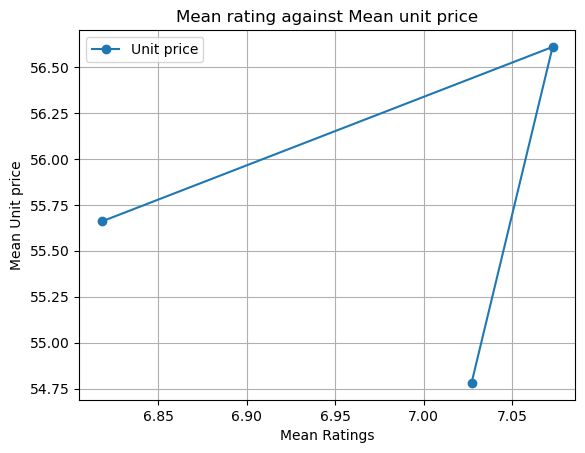

In [39]:
sales.groupby('City').agg({
    'Rating' :'mean',
    'Unit price': 'mean'
}).plot(kind = 'line', x= 'Rating',y= 'Unit price', marker = 'o')
plt.title('Mean rating against Mean unit price')
plt.xlabel('Mean Ratings')
plt.ylabel('Mean Unit price')
plt.grid(axis= 'both')
          
    

Text(0.5, 1.0, 'Product line vs Total')

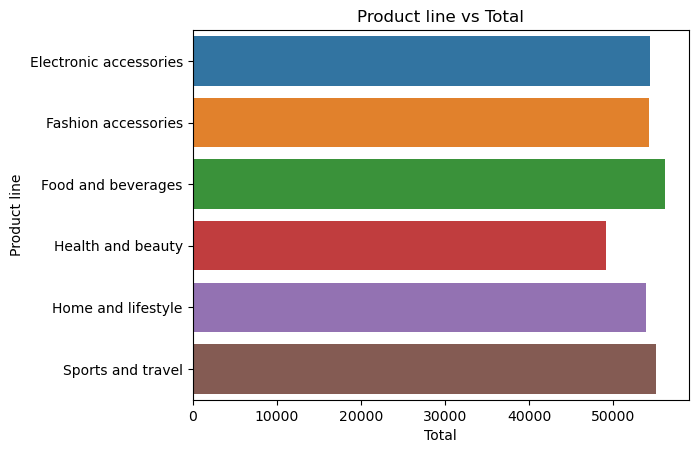

In [47]:
sns.barplot(
sales.groupby('Product line')['Total'].sum().reset_index(),
y = 'Product line',
x = 'Total',
)
plt.title('Product line vs Total')


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

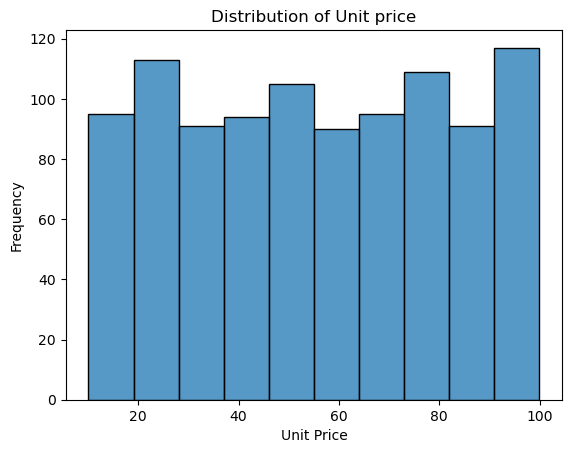

In [50]:
sns.histplot( data = sales, x = 'Unit price', bins = 10)
plt.title('Distribution of Unit price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Unit price vs Rating')

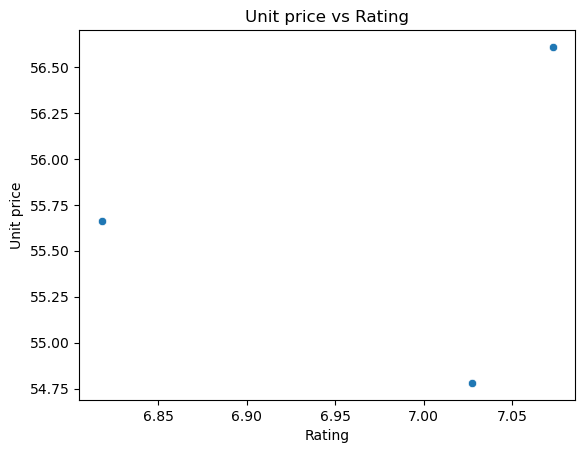

In [54]:
sns.scatterplot(
sales.groupby('City').agg({
    'Rating':'mean',
    'Unit price': 'mean'
}).reset_index (),
x = 'Rating',
y = 'Unit price')
plt.title('Unit price vs Rating')